In [1]:
import sys
sys.path.append('..')
from dnn import DNN
from dbn import DBN
from load_data import *

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from tqdm import tqdm

# Load data

In [2]:
binary_alpha = lire_alpha_digits(['A', 'E', 'X', '4'])

In [3]:
X_train, y_train, X_test, y_test = load_mnist()

# Hyperparameters

In [4]:
epochs = 1000
batch_size = 128
learning_rate = 1e-3
patience = 10

nb_layers = 3
neurons = [256, 256, 512]

# Alpha Digits

In [5]:
dbn_alpha = DBN(X=binary_alpha, L=nb_layers, qs=neurons, use_adam=True)

In [6]:
dbn_alpha.train_DBN(epochs=epochs, learning_rate=learning_rate, batch_size=batch_size)

RBM 2: 100%|██████████| 3/3 [00:42<00:00, 14.04s/rbm, total_loss=0.114]


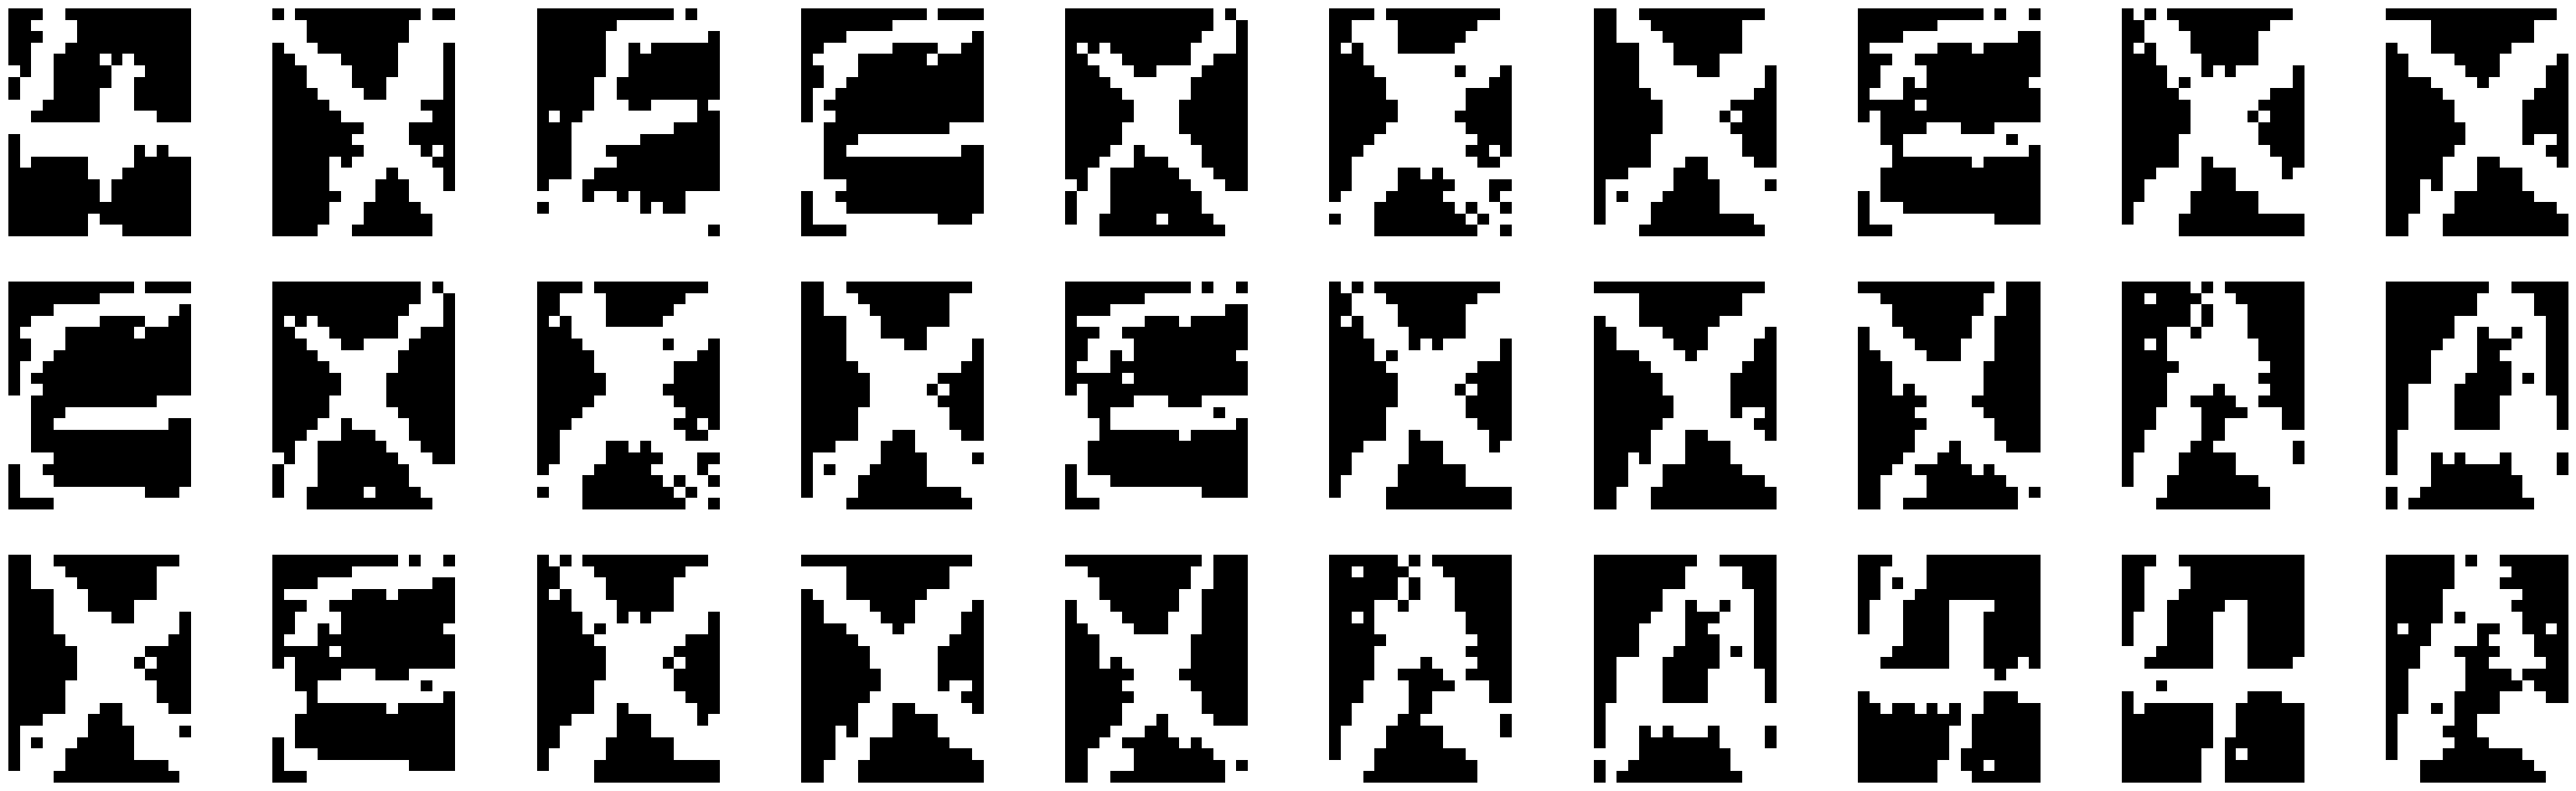

In [7]:
alpha_gen = dbn_alpha.generer_image_DBN(num_samples=30, gibbs_steps=500, image_size=(20, 16))

# MNIST

### SGD

In [8]:
dnn = DNN(X_train, y_train, num_classes=10, num_hidden_layers=nb_layers, neurons=neurons,
                X_val=X_test, y_val=y_test, use_adam=False)
dnn.pretrain_DNN(epochs=epochs, learning_rate=learning_rate, batch_size=batch_size)

RBM 0:   0%|          | 0/3 [1:13:47<?, ?rbm/s]


KeyboardInterrupt: 

In [ ]:
losses, accuracies, val_losses, val_accuracies = dnn.retropropagation(
    epochs=epochs, learning_rate=learning_rate, batch_size=batch_size, plot_=True, patience=patience, 
    suptitle='MNIST - SGD')

### Adam

In [ ]:
dnn = DNN(X_train, y_train, num_classes=10, num_hidden_layers=nb_layers, neurons=neurons,
                X_val=X_test, y_val=y_test, use_adam=True)
dnn.pretrain_DNN(epochs=epochs, learning_rate=learning_rate, batch_size=batch_size)

In [ ]:
losses, accuracies, val_losses, val_accuracies = dnn.retropropagation(
    epochs=epochs, learning_rate=learning_rate, batch_size=batch_size, plot_=True, patience=patience, 
    suptitle='MNIST - True')

# All figures

In [12]:
def run_dnn(pretrain, nb_layers, neurons, suptitle, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, 
            epochs=epochs, learning_rate=learning_rate, batch_size=batch_size, plot_=True):
    dnn = DNN(X_train, y_train, num_classes=10, num_hidden_layers=nb_layers, neurons=neurons,
                X_val=X_test, y_val=y_test)
    if pretrain:
        dnn.pretrain_DNN(epochs=epochs, learning_rate=learning_rate, batch_size=batch_size)
    losses, accuracies, val_losses, val_accuracies = dnn.retropropagation(
    epochs=epochs, learning_rate=learning_rate, batch_size=batch_size, plot_=plot_, patience=patience, 
    suptitle=suptitle)
    return dnn, losses, accuracies, val_losses, val_accuracies

100%|██████████| 2/2 [02:28<00:00, 74.32s/it]


Epoch 0:: loss: 2.154, accuracy: 26.7%
Epoch 100:: loss: 0.1607, accuracy: 97.4%
Epoch 200:: loss: 0.0849, accuracy: 99.8%
Epoch 300:: loss: 0.0539, accuracy: 100.0%
Epoch 400:: loss: 0.0381, accuracy: 100.0%
Epoch 500:: loss: 0.0288, accuracy: 100.0%
Epoch 600:: loss: 0.0229, accuracy: 100.0%
Epoch 700:: loss: 0.0188, accuracy: 100.0%
Epoch 800:: loss: 0.0159, accuracy: 100.0%
Epoch 900:: loss: 0.0137, accuracy: 100.0%
Epoch 999:: loss: 0.012, accuracy: 100.0%


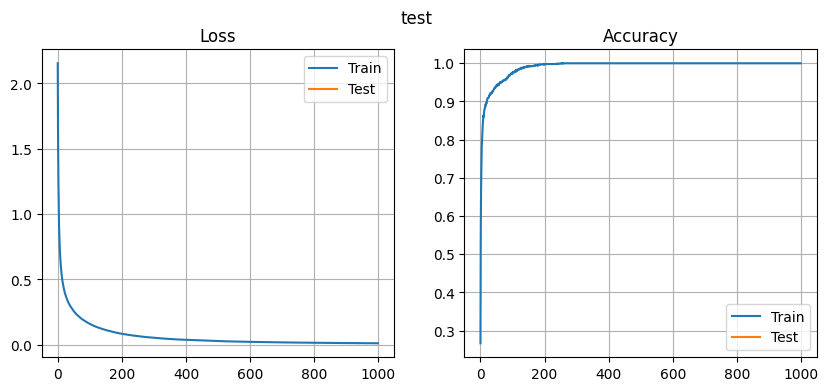

In [13]:
dnn, _, _, _, _ = run_dnn(True, 2, [200, 200], 'test', X_train=X_test[:1000], y_train=y_test[:1000], X_test=None, y_test=None, epochs=1000, learning_rate=1e-3)

In [14]:
dnn.save_weights('weights.pkl')

In [15]:
dnn.test_DNN(X_train, y_train, 128)

(0.5369998940087758, 0.86425)

In [19]:
dnn2 = DNN(X_test[:1000], y_test[:1000], num_classes=10, num_hidden_layers=2, neurons=[200, 200],
                X_val=X_test, y_val=y_test)

In [17]:
dnn2.load_weights(path='weights.pkl')

In [20]:
dnn2.test_DNN(X_train, y_train, 128)

(2.6113635946775116, 0.11035)

In [26]:
import pickle
l = [1,2,3,[4, 5, 6]]
with open("test.pkl", "wb") as fp:   #Pickling
    pickle.dump(l, fp)

In [27]:
with open("test.pkl", "rb") as fp:   # Unpickling
    b = pickle.load(fp)

b

[1, 2, 3, [4, 5, 6]]

In [28]:
import os

In [32]:
os.path.exists('./dnn.ipynb')

True

### Figure 1

In [ ]:
losses_nb_layers, accuracies_nb_layers, val_losses_nb_layers, val_accuracies_nb_layers = [], [], [], []
layers = [2, 3, 5, 7, 10]

In [ ]:
for nb_layer in layers:
    neurons = [200]*nb_layer
    losses, accuracies, val_losses, val_accuracies = run_dnn(False, nb_layer, neurons, suptitle=f'{nb_layers} layers - random init', X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, 
            epochs=epochs, learning_rate=learning_rate, baych_size=batch_size, plot_=True)
    clear_output(wait=True)
    
    losses_pretrain, accuracies_pretrain, val_losses_pretrain, val_accuracies_pretrain = run_dnn(True, nb_layer, neurons, suptitle=f'{nb_layers} layers - pretrain', X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, 
            epochs=epochs, learning_rate=learning_rate, baych_size=batch_size, plot_=True)
    clear_output(wait=True)
    
    losses_nb_layers.append((losses, losses_pretrain))
    accuracies_nb_layers.append((accuracies, accuracies_pretrain))
    val_losses_nb_layers.append((val_losses, val_losses_pretrain))
    val_accuracies_nb_layers.append((val_accuracies, val_accuracies_pretrain))

In [ ]:
def plot(i, losses_nb_layers, accuracies_nb_layers, val_losses_nb_layers, val_accuracies_nb_layers, ax, xlabel):
    ax[0].plot(losses_nb_layers[i][0], label='Train set- random init')
    ax[0].plot(losses_nb_layers[i][1], '--', label='Train set - pretrain')
    ax[0].plot(val_losses_nb_layers[i][0], label='Valid set- random init')
    ax[0].plot(val_losses_nb_layers[i][1], '--', label='Valid set - pretrain')
    ax[0].set_xlabel(xlabel)
    ax[0].grid('on')
    ax[0].legend()
    
    ax[1].plot(accuracies_nb_layers[i][0], label='Train set- random init')
    ax[1].plot(accuracies_nb_layers[i][1], '--', label='Train set - pretrain')
    ax[1].plot(val_accuracies_nb_layers[i][0], label='Valid set- random init')
    ax[1].plot(val_accuracies_nb_layers[i][1], '--', label='Valid set - pretrain')
    ax[1].grid('on')
    ax[1].legend()
    
    if i == 0:
        ax[0].set_title('Loss')
        ax[1].set_title('Accuracy')

In [ ]:
fig, axs = plt.subplots(len(layers), 2, figsize=(10, 4*len(layers)))
for i in range(len(layers)):
    plot(i, losses_nb_layers, accuracies_nb_layers, val_losses_nb_layers, val_accuracies_nb_layers, ax=axs[i], 
         xlabel=f'{layers[i]} layers')

### Figure 2

In [ ]:
losses_nb_neurons, accuracies_nb_neurons, val_losses_nb_neurons, val_accuracies_nb_neurons = [], [], [], []
nb_neurons = [100, 200, 700, 1000]

In [ ]:
for nb_neuron in nb_neurons:
    neurons = [nb_neuron]*2
    losses, accuracies, val_losses, val_accuracies = run_dnn(False, 2, neurons, suptitle=f'{nb_neuron} neurons - random init', X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, 
            epochs=epochs, learning_rate=learning_rate, baych_size=batch_size, plot_=True)
    clear_output(wait=True)
    
    losses_pretrain, accuracies_pretrain, val_losses_pretrain, val_accuracies_pretrain = run_dnn(True, 2, neurons, suptitle=f'{nb_neuron} neurons - pretrain', X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, 
            epochs=epochs, learning_rate=learning_rate, baych_size=batch_size, plot_=True)
    clear_output(wait=True)
    
    losses_nb_neurons.append((losses, losses_pretrain))
    accuracies_nb_neurons.append((accuracies, accuracies_pretrain))
    val_losses_nb_neurons.append((val_losses, val_losses_pretrain))
    val_accuracies_nb_neurons.append((val_accuracies, val_accuracies_pretrain))

In [ ]:
fig, axs = plt.subplots(len(nb_neurons), 2, figsize=(10, 4*len(nb_neurons)))
for i in range(len(nb_neurons)):
    plot(i, losses_nb_neurons, accuracies_nb_neurons, val_losses_nb_neurons, val_accuracies_nb_neurons, ax=axs[i], 
         xlabel=f'{nb_neurons[i]} neurons')

### Figure 3

In [ ]:
losses_nb_train, accuracies_nb_train, val_losses_nb_train, val_accuracies_nb_train = [], [], [], []
lenTrains = [1000, 3000, 7000, 10_000, 30_000, 60_000]

In [ ]:
for lenTrain in lenTrains:
    indices = np.random.choice(range(len(X_train)), size=lenTrain, replace=False)
    sub_X_train = X_train[indices]
    sub_y_train = y_train[indices]
    losses, accuracies, val_losses, val_accuracies = run_dnn(True, 2, [200, 200], suptitle=f'{lenTrain} training samples - random init', X_train=sub_X_train, y_train=sub_y_train, X_test=X_test, y_test=y_test, 
            epochs=epochs, learning_rate=learning_rate, baych_size=batch_size, plot_=True)
    clear_output(wait=True)
    
    losses_pretrain, accuracies_pretrain, val_losses_pretrain, val_accuracies_pretrain = run_dnn(True, 2, [200, 200], suptitle=f'{lenTrain} training samples - pretrain', X_train=sub_X_train, y_train=sub_y_train, X_test=X_test, y_test=y_test, 
            epochs=epochs, learning_rate=learning_rate, baych_size=batch_size, plot_=True)
    clear_output(wait=True)
    
    losses_nb_train.append((losses, losses_pretrain))
    accuracies_nb_train.append((accuracies, accuracies_pretrain))
    val_losses_nb_train.append((val_losses, val_losses_pretrain))
    val_accuracies_nb_train.append((val_accuracies, val_accuracies_pretrain))

In [ ]:
fig, axs = plt.subplots(len(lenTrains), 2, figsize=(10, 4*len(lenTrains)))
for i in range(len(lenTrains)):
    plot(i, losses_nb_train, accuracies_nb_train, val_losses_nb_train, val_accuracies_nb_train, ax=axs[i], 
         xlabel=f'{lenTrains[i]} training samples')